# **CSE 164, Assignment 1 (60 pts), Spring 2023**


## **Name**: Elliott Jensen
## **Student ID**: 1800254

## Instruction 

- Submit your assignments onto **Canvas** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file with solutions to the programming assignment.
    
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 
- Don't use any magic function from other libraries. You will get **no credit** if a Gaussian function from a known library is used when you are asked to implement “Gaussian Filtering” from scratch.
- Don't change the input and output structure of pre-defined functions. Most coding parts can be finished with about 5-6 lines of codes. 
- Make sure you have installed required packages: <code>numpy, scikit-image, PIL, opencv-python, matplotlib</code>

## Objective 

- **Task 1:** Getting familiar with **Numpy**, **OpenCV**, **PIL** and **Matplotlib**
- **Task 2:** Review of **Image Filtering**
- **Task 3:** Review of **Edge Detection**

## Preparation: Import the Dependencies

> This section loads some required libraries used in this notebook: **numpy**,**cv2**, **skimage**, **PIL**, **matplotlib**

In [2]:
import numpy as np
import cv2 as cv 
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

## Preparation: Read Image from Urls

> In this step we will read an image from url, and display it using Matplotlib.

image shape: (220, 550, 3)


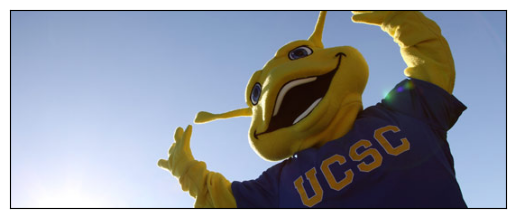

In [3]:
url = "https://www.ucsc.edu/about/images/mascot-550_v2.jpg"  

image = io.imread(url)
print(f'image shape: {image.shape}')
plt.xticks([]), plt.yticks([])
plt.imshow(image)

## Question1: Image Filters (30pts)

> In this question, you will apply several filters to an polluted image with salt-and-pepper noise.

### Question1.1 Salt-and-pepper Noise (5pts)

Add salt-and-pepper noise onto the clean image, which can be implemented by randomly setting some pixels to be dark/white. Hint: the peppers are black dots and the salts are white dots.

In [4]:
def add_sp_noise(img, percent=0.005):
  # img is clean image, percent is the ratio of pixels that are  affected by sp noise
  # output noisy image
  out = np.copy(img)

  # Salt mode
  num_salt = np.ceil(percent * np.prod(img.shape[:2]) * 0.5)
  coords = tuple([np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape[:2]])
  out[coords] = 255

  # TODO: Implement Pepper mode
  # for simplicity, we do not consider the scenario where a pixel is chosen in both salt mode and pepper mode
  ################## Your codes begins here #######################
  num_pepper = np.ceil(percent * np.prod(img.shape[:2]) * 0.5)
  coords = tuple([np.random.randint(0, i - 1, int(num_pepper))
            for i in image.shape[:2]])
  out[coords] = 0

  ################# Your codes ends here ###########################

  return out

In [5]:
sp_noisy_image = add_sp_noise(image, 0.1)

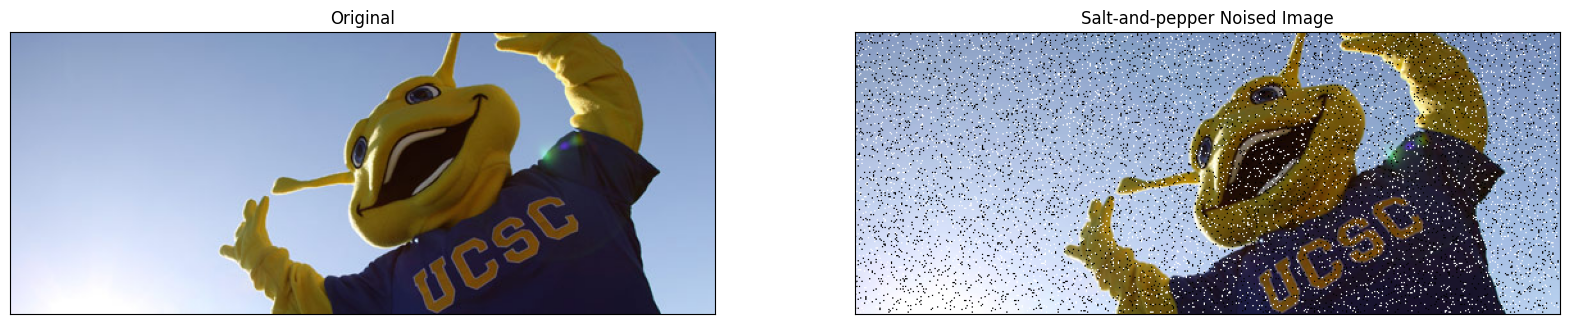

In [6]:
# Visualization

plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sp_noisy_image),plt.title('Salt-and-pepper Noised Image')
plt.xticks([]), plt.yticks([])
plt.show()

### Question1.2 Box Filter (5pts)
**Your goal is to implement a Box Filter with numpy.**

> The box filter is actually a 2D matrix that averages the covered pixels. In another word, all pixels in the window have the averaged influence on the output.

> OpenCV provides a function [cv.filter2D()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) to convolve a user-customized kernel with an image. The call to cv.filter2D() is provided in this assignment. In another word, your job is to create a proper box filter, and cv.filter2D() will operate on the image.

> Let's apply a block filter and see what happens to the **original image** and **noised image**.

In [7]:
import cv2 as cv
import numpy as np

# Define the Filter function

def box_filter(img, ksize):
    # ksize is the kernel size. It should be odd and positive.

    # TODO: create a 2d box filter of size ksize*ksize using numpy
    ################## Your codes begins here #######################
    box_kernel = np.ones((ksize,ksize)) * (1/9)
    ################# Your codes ends here ###########################

    img = cv.filter2D(img, -1, box_kernel) # This applies your customized filter to the image.
    return img


In [8]:
# Perform Box Filter on the images

image_with_box_filter = box_filter(image,7)
noised_image_with_box_filter = box_filter(sp_noisy_image,7)

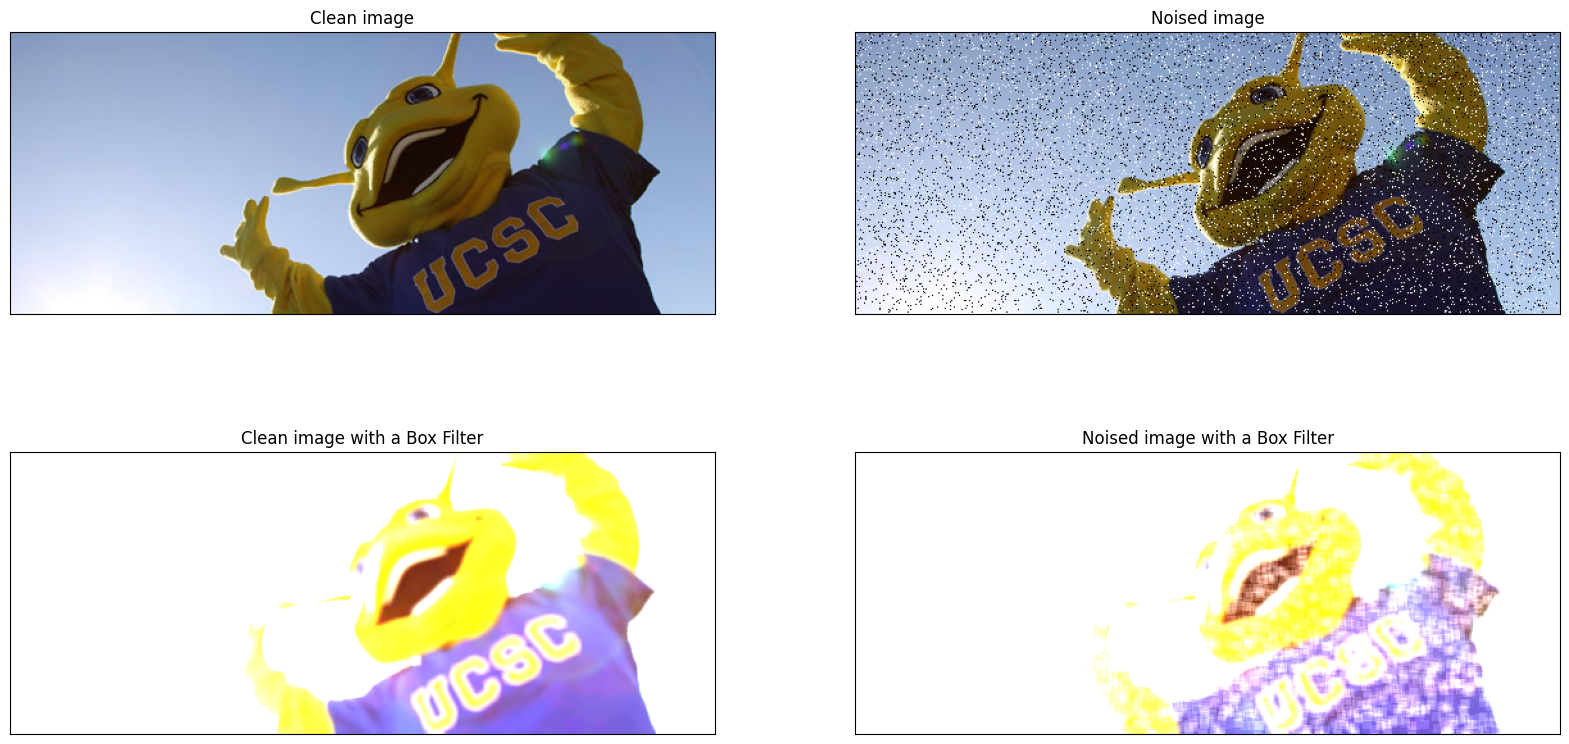

In [9]:
# Visualization

plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(image),plt.title('Clean image')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sp_noisy_image),plt.title('Noised image')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(image_with_box_filter),plt.title('Clean image with a Box Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(noised_image_with_box_filter),plt.title('Noised image with a Box Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### Question1.3 Gaussian Filter (10pts)
**Compute 2D gaussian kernel using 1D gaussian kernel with OpenCV api.**

> The gaussian kernel is an approximation of a gaussian function, where the nearest neighboring pixels have the most influence on the output.


> In OpenCV, a 1D gaussian kernel can be created with the function, [cv.getGaussianKernel()](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa). Besides the the width and height of the kernel, we should also specify the standard deviation of the gaussian function in the X and Y directions. Check the docs for more details. Note that cv.getGaussianKernel() only return 1d gaussian kernel. It is you job to create 2d gaussian kernel from 1d gaussian kernel (hint: separability)


> Also, the cv.filter2D() will apply the customized filter to the image. Your job is to create a proper gaussian kernel.

In [10]:
import cv2 as cv
import numpy as np

# Define the Filter function

def gauss_filter(img, ksize, sigma):
  # ksize is the kernel size. It should be odd and positive.
  # sigma is the standard deviation in gaussian distribution

  # TODO:  create a 2d gaussian kernel of size ksize*ksize using cv.getGaussianKernel()
  ################## Your codes begins here #######################
  # gaussian_kernel_1d =
  gaussian_kernel_2d = cv.getGaussianKernel(ksize,sigma)
  ################# Your codes ends here ###########################
 

  img = cv.filter2D(img, -1, gaussian_kernel_2d)
  return img


In [11]:
# Perform Gaussian Filter on the images

image_with_gaussian_filter = gauss_filter(image,ksize=7, sigma=3)
noised_image_with_gaussian_filter = gauss_filter(sp_noisy_image,ksize=7, sigma=3)

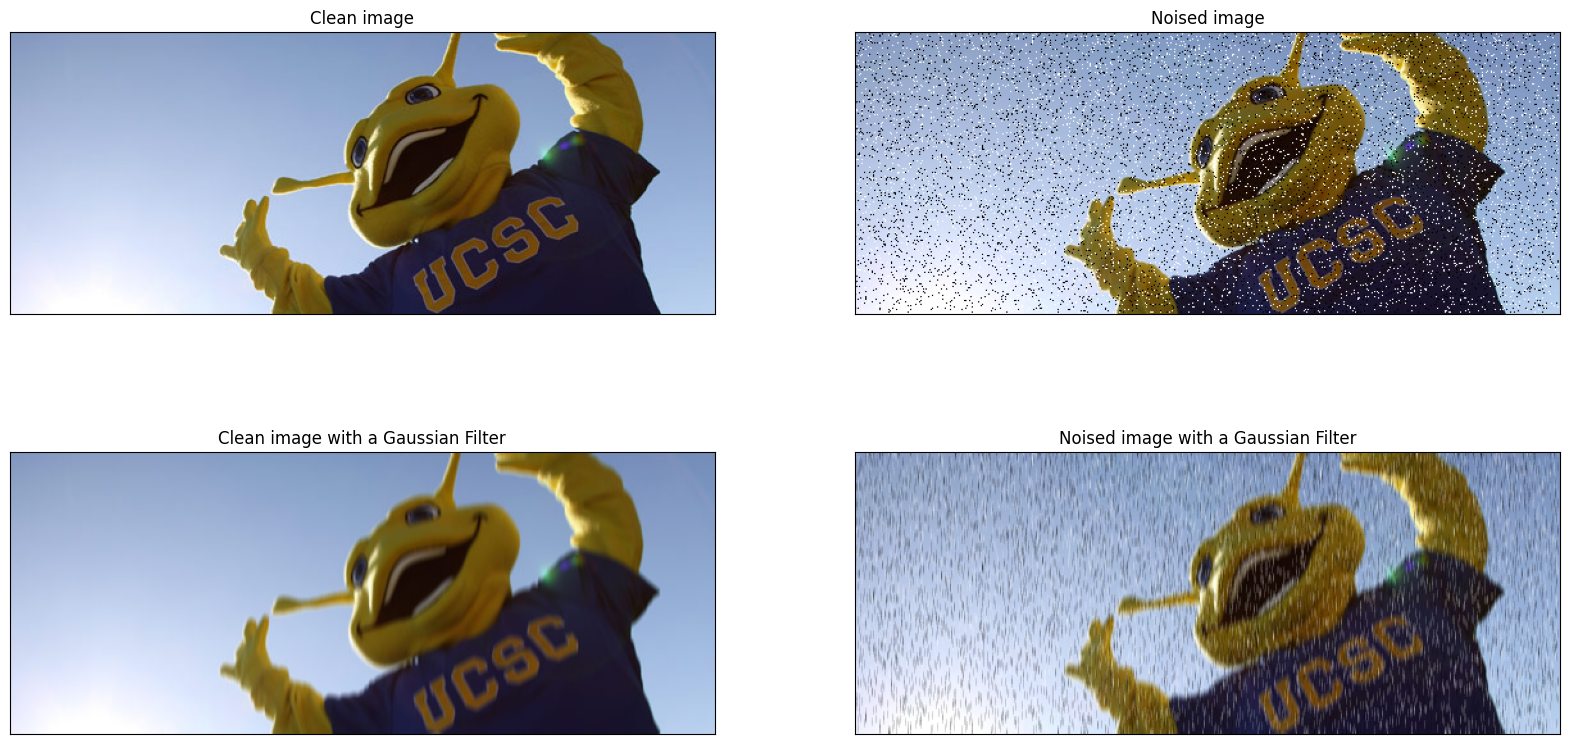

In [12]:
# Visualization

plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(image),plt.title('Clean image')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sp_noisy_image),plt.title('Noised image')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(image_with_gaussian_filter),plt.title('Clean image with a Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(noised_image_with_gaussian_filter),plt.title('Noised image with a Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

### Question1.4 (10pts)
**Implement median filter from scratch**

> The median filtering takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise (random occurrences of black and white pixels) in an image.

In [13]:
def median_filter(img, ksize=3):
  # img is clean image
  # ksize is kernel size and must be an odd number
  # output median filtered image
  assert ksize % 2 == 1
  # set image borders
  bd = int(ksize / 2)
  # copy image size
  median_img = np.zeros_like(img)
  for i in range(bd, img.shape[0] - bd):
    for j in range(bd, img.shape[1] - bd):
      window = img[i - bd : i + bd + 1, j - bd : j + bd + 1, :]
      
      # TODO: compute the median value in the window and assign it to current pixel
      ################## Your codes begins heree #######################
      window = window[0]

      flatten_window = np.concatenate((window[0],window[1],window[2]))

      median_val = np.sort(flatten_window)
      median_val = median_val[4]

      # flatten_window = 
      # median_val = 
      ################# Your codes ends here ###########################
      median_img[i, j, :] = median_val.astype(np.uint8)
  return median_img

In [14]:
# Perform Median Filter on the images

image_with_median_filter = median_filter(image,ksize=3)
noised_image_with_median_filter = median_filter(sp_noisy_image,ksize=3)

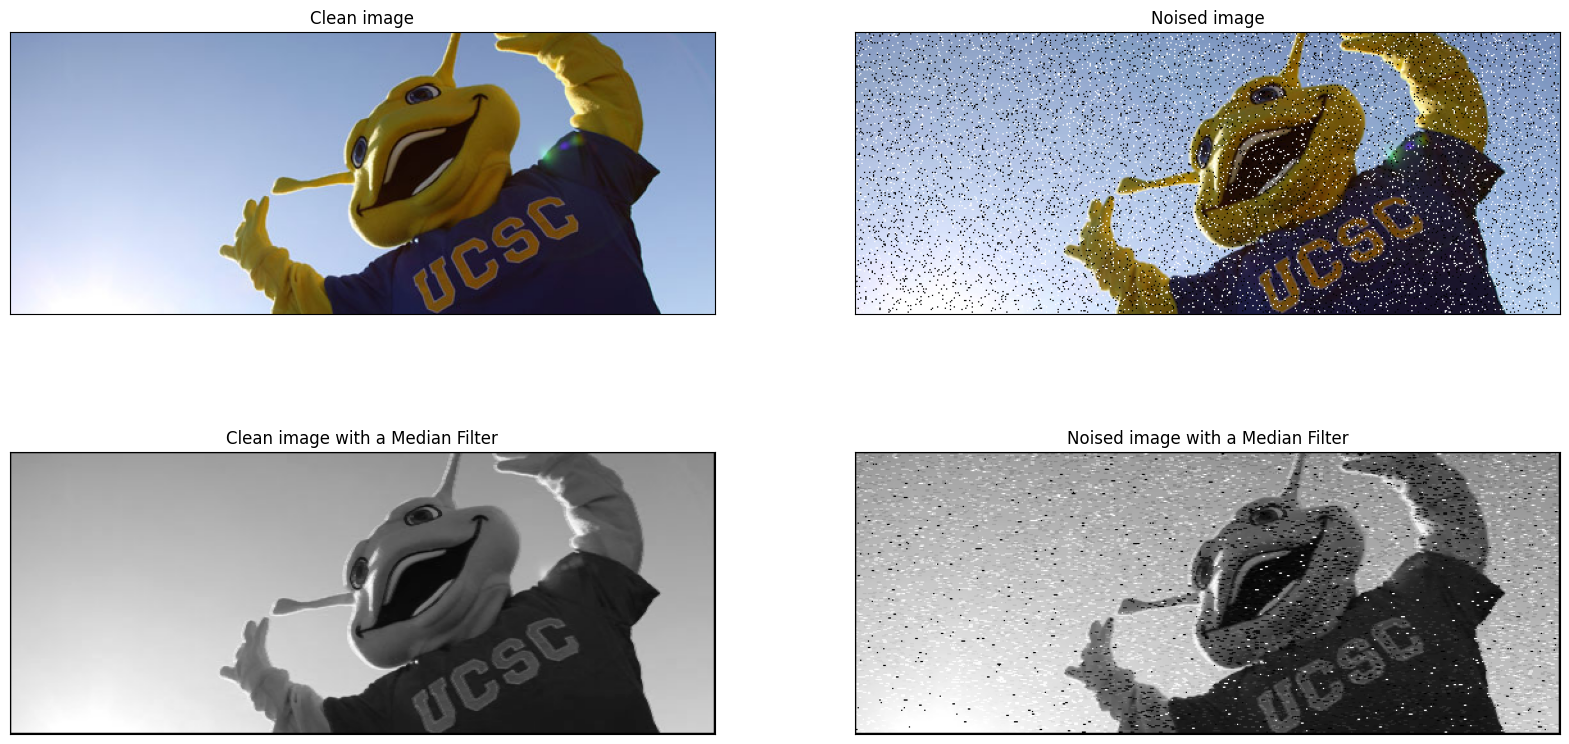

In [15]:
# Visualization

plt.figure(figsize=(20,10))
plt.subplot(221),plt.imshow(image),plt.title('Clean image')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sp_noisy_image),plt.title('Noised image')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(image_with_median_filter),plt.title('Clean image with a Median Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(noised_image_with_median_filter),plt.title('Noised image with a Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

## Question2: Canny Edge Detection (30pts)

> In this question, you will implement multiple stages of Canny Edge Detection, which is a popular edge detection algorithm developed by John F. Canny in 1986.



**Convert into gray-scale image**

> For simplicity, we will deal with only gray-scale image. Note that OpenCV implementation can deal with color image, check [this answer](https://stackoverflow.com/questions/40725804/can-canny-in-opencv-deal-with-both-grayscale-and-color-images) for more details

Text(0.5, 1.0, 'Gray Image')

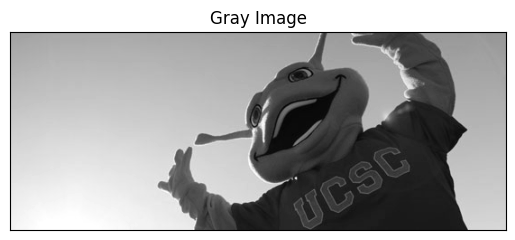

In [16]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.xticks([]), plt.yticks([])
plt.imshow(gray_image, cmap='gray', vmin=0, vmax=255)
plt.title('Gray Image')

**Noise Reduction**

> Edge detection is susceptible to noise in the image. To prevent that noise is mistaken for edges, the noise in the image is reduced using a 5x5 Gaussian filter.

In [17]:
def gauss_filter5x5(img):
  gauss_kernel = np.array([[2, 4,  5,  2,  2],
          [4, 9,  12, 9,  4],
          [5, 12, 15, 12, 5],
          [4, 9,  12, 9,  4],
          [2, 4,  5,  4,  2]], np.float32) / 156
  return cv.filter2D(img,-1,gauss_kernel)

In [18]:
gimage = gauss_filter5x5(gray_image)

Text(0.5, 1.0, 'After Gaussian Filter')

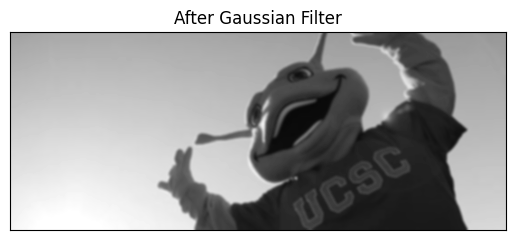

In [19]:
plt.imshow(gimage, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('After Gaussian Filter')

**Finding Gradient**

> The Canny algorithm basically finds edges where the grayscale intensity of the image changes the most. To get the gradient in horizontal direction and vertical direction, smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction.

### Question2.1 (10pts)

**Calculate the gradient magnitude and gradient orientation with Sobel Kernels in both horizontal and vertical direction**

> The Sobel Kernel is a discrete differentiation operator, computing an approximation of the gradient of the image intensity function.

> Likewise, the call to cv.filter2D() is provided in this assignment. Your job is to calculate the gradient magnitude and gradient orientation with the filtered results. 

> Hint: The gradient magnitude is calculated as the square root of the sum of the squares of the x and y gradients, while the gradient orientation is calculated as the arctangent of the ratio of the y gradient to the x gradient, converted to degrees.

In [20]:
def sobel_filter3x3(img):

  sobel_kernel_x =\
      np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]], np.float32)
  sobel_kernel_y =\
     np.array([[-1, -2, -1],
                [0,  0,  0],
                [1,  2,  1]], np.float32) 
 
  
  Gx = cv.filter2D(img,-1,sobel_kernel_x).astype(np.float32)
  Gy = cv.filter2D(img,-1,sobel_kernel_y).astype(np.float32)

  # TODO: implement 3x3 sobel kernel
  
  ################## Your codes begins here #######################
#   print(Gx)
#   print(Gy)
  grim = np.sqrt(np.square(Gx) + np.square(Gy))
  gphase = Gy/Gx 
  # gphase = 
  ################## Your codes ends here #######################
  
  return grim, gphase

In [21]:
grim, gphase = sobel_filter3x3(gimage)

<ipython-input-20-40ed7e3d22aa>:22: RuntimeWarning: divide by zero encountered in true_divide
  gphase = Gy/Gx
<ipython-input-20-40ed7e3d22aa>:22: RuntimeWarning: invalid value encountered in true_divide
  gphase = Gy/Gx


Text(0.5, 1.0, 'After Finding Gradient')

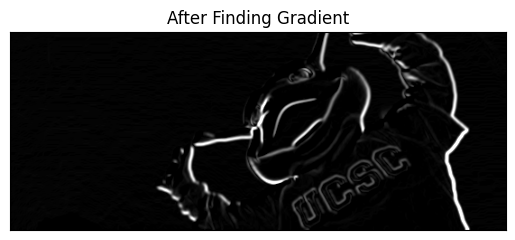

In [22]:
plt.imshow(grim, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.title('After Finding Gradient')

### Question2.2 (10pts)

**Complete Non-maximum Suppression**

> After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Its value is kept if it is, and removed otherwise. The result you get is a binary image with "thin edges".


> The direction is rounded to one of four possible angles (namely 0, 45, 90 or 135). Only code for two of them is provided, implement the code for the other two.

In [23]:
def nms(grim, gphase):
  # grim contains gradient magnitude at each pixel, gphase contains gradient direction at each pixel
  # output gradient image after nms
  gmax = np.zeros(grim.shape)
  for i in range(gmax.shape[0]):
    for j in range(gmax.shape[1]):
      if gphase[i][j] < 0:
        gphase[i][j] += 360
      
      if ((j + 1) < gmax.shape[1]) and ((j - 1) >= 0) and ((i + 1) < gmax.shape[0]) and ((i - 1) >= 0):
        # 0 degrees
        if (gphase[i][j] >= 337.5 or gphase[i][j] < 22.5) or (gphase[i][j] >= 157.5 and gphase[i][j] < 202.5):
            if grim[i][j] >= grim[i][j + 1] and grim[i][j] >= grim[i][j - 1]:
                gmax[i][j] = grim[i][j]

        # TODO: implement non-maximum suppression for 45 degrees and 90 degrees
        ################## Your codes begins here #######################
        # 45 degrees
        if (gphase[i][j] >= 22.5 and gphase[i][j] < 67.5) or (gphase[i][j] >= 202.5 and gphase[i][j] < 247.5):
            # if grim[i][j] >= grim[i - 1][j + 1] and grim[i][j] >= grim[i + 1][j - 1]:
            if grim[i][j] >= grim[i + 1][j + 1] and grim[i][j] >= grim[i - 1][j - 1]:
                gmax[i][j] = grim[i][j]

        # TODO: implement non-maximum suppression for 90 degrees and 135 degrees
        ################## Your codes begins here #######################
        
        # 90 degrees
        if (gphase[i][j] >= 67.5 and gphase[i][j] < 112.5) or (gphase[i][j] >= 247.5 and gphase[i][j] < 292.5):
            # if grim[i][j] >= grim[i - 1][j + 1] and grim[i][j] >= grim[i + 1][j - 1]:
            if grim[i][j] >= grim[i + 1][j + 1] and grim[i][j] >= grim[i - 1][j - 1]:
                gmax[i][j] = grim[i][j]

        # 135 degrees
        if (gphase[i][j] >= 112.5 and gphase[i][j] < 157.5) or (gphase[i][j] >= 202.5 and gphase[i][j] < 247.5):
            # if grim[i][j] >= grim[i - 1][j + 1] and grim[i][j] >= grim[i + 1][j - 1]:
            if grim[i][j] >= grim[i + 1][j + 1] and grim[i][j] >= grim[i - 1][j - 1]:
                gmax[i][j] = grim[i][j]
        ################# Your codes ends here ###########################

        # 135 degrees
        if (gphase[i][j] >= 112.5 and gphase[i][j] < 157.5) or (gphase[i][j] >= 292.5 and gphase[i][j] < 337.5):
            # if grim[i][j] >= grim[i - 1][j - 1] and grim[i][j] >= grim[i + 1][j + 1]:
            if grim[i][j] >= grim[i + 1][j - 1] and grim[i][j] >= grim[i - 1][j + 1]:
                gmax[i][j] = grim[i][j]       


  return gmax

In [24]:
gmax = nms(grim, gphase)

Text(0.5, 1.0, 'After Non-Maximum Suppression')

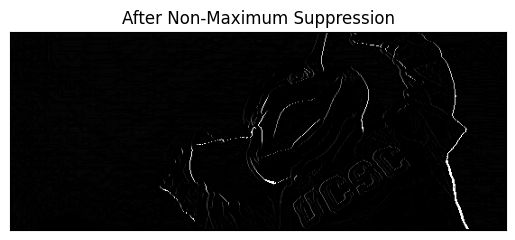

In [25]:
plt.xticks([]), plt.yticks([])
plt.imshow(gmax, cmap='gray', vmin=0, vmax=255)
plt.title('After Non-Maximum Suppression')

**Hysteresis Thresholding**

> This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded.

**Double Thresholding**

> Edge pixels stronger than the high threshold are marked as strong; edge pixels weaker than the low threshold are suppressed and edge pixels between the two thresholds are marked as weak.

In [40]:
def double_threshold(img):
  gthres  = np.zeros(img.shape)
  strong = 1
  weak  = 0.6
  mmax = np.max(img)
  low, high = 0.1 * mmax,0.8 * mmax
  strongs = []
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      px = img[i][j]
      if px >= high:
        gthres[i][j] = strong
        strongs.append((i, j))
      elif px >= low:
        gthres[i][j] = weak
  
  return gthres, strongs

In [50]:
gthres, strongs = double_threshold(gmax)


### Question2.3 (10pts)

**implement the condition where a pixel is marked as part of an edge in DFS.**

> The algorithm considers strong pixels and weak pixels connected to strong pixels as part of edges. After double thresholding, a search algorithm is run to find such pixels.


> Here we consider two pixels are connected if they are adjacent in 8 directions: top, bottom, left, right, upper right, upper left, lower right, lower left.


> Depth-first search (DFS) is an algorithm for traversing or searching tree or graph data structures. Here it is used to traverse over all pixels in the image to see if they are a part of edges. Check [here](https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/) for more details. 


In [54]:
visited = np.zeros(gthres.shape, bool)
# 8-connectivity: bottom, right, top, left, upper right, upper left, lower right, lower left
dx = [1, 0, -1,  0, -1, -1, 1,  1]
dy = [0, 1,  0, -1,  1, -1, 1, -1]

def exists(x, y):
    return x >= 0 and x < gthres.shape[0] and y >= 0 and y < gthres.shape[1]

def dfs(origin):
  # after dfs, the pixels with value=1 in visited are marked as edges
  q = [origin]
  while len(q) > 0:
    s = q.pop()
    visited[s] = True
    # print("visited.shape = ", visited.shape)
    gthres[s] = 1
    # print("examining: ", s)
    for k in range(len(dx)):
      for c in range(1, 16):
        nx, ny = s[0] + c * dx[k], s[1] + c * dy[k]
        # print("one edge of ", s ," is ", nx, ", ", ny)
        # print("nx, ny = ", nx, ", ", ny)
        
        # TODO: implement the condition where this pixel should be visited (and thus marked as part of an edeg)
        ################## Your codes begins here #######################
        # if (not visited[(nx,ny)] and exists(nx,ny)):
            # print("if")
            
        # if (exists(nx,ny) and not visited[(nx,ny)]):
        # print("gthres[nx,ny] = ", gthres[nx,ny])
        if(exists(nx,ny) and gthres[nx,ny]==0.6):


        ################# Your codes ends here ###########################
            q.append((nx, ny))
            # print("len(q) = ", len(q))
        # else:
        #     print("no")
    # break
    #   print("q.length = ", len(q))
    # q.clear()
            # print("q.length = ", len(q))
        # else:
        #     print("else")
            # q.insert(0,(nx, ny))
      

In [55]:
for s in strongs:
  if not visited[s]:
    dfs(s)
for i in range(gthres.shape[0]):
  for j in range(gthres.shape[1]):
    gthres[i, j] = 1.0 if visited[i, j] else 0.0

Text(0.5, 1.0, 'After Hysteresis Thresholding')

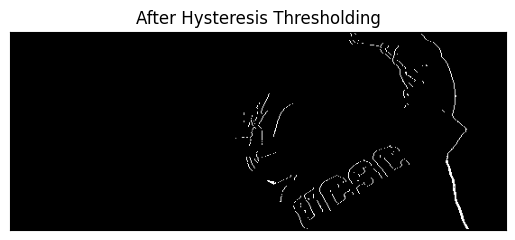

In [56]:
plt.xticks([]), plt.yticks([])
plt.imshow(gthres, cmap='gray')
plt.title('After Hysteresis Thresholding')